In [280]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import random as rm
import time as tm
import matplotlib.pyplot as plt
from scipy import stats
from pandas.api.types import is_string_dtype 
from pandas.api.types import is_numeric_dtype 
import sklearn.metrics as skm
import sklearn.impute as ski
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import math
import scipy.stats as stats
import statistics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [281]:
df1 = pd.read_csv('multivariate_eng_df.csv', )
##df1 = pd.read_csv('merged_df_ashvFMT.csv')
df1 = df1.drop(df1.columns[0], axis=1)
df1

Date  STATE PROVINCE_STATE_NAME  Completeness_pct  \
0     2020-03-01      6          California               0.0   
1     2020-03-02      6          California               0.0   
2     2020-03-03      6          California               0.0   
3     2020-03-04      6          California               0.0   
4     2020-03-05      6          California               0.0   
...          ...    ...                 ...               ...   
7895  2022-04-25     48               Texas           25120.6   
7896  2022-04-26     48               Texas           25120.6   
7897  2022-04-27     48               Texas           25120.6   
7898  2022-04-28     48               Texas           25120.6   
7899  2022-04-29     48               Texas           25120.6   

      Administered_Dose1_Recip  Administered_Dose1_Recip_5Plus  \
0                          0.0                             0.0   
1                          0.0                             0.0   
2                          0.0                             0.0   
3                          0.0                             0.0   
4                          0.0                             0.0   
...                        ...                             ...   
7895                20890120.0                      20884105.0   
7896                20897363.0                      20891339.0   
7897                20907738.0                      20901703.0   
7898                20914938.0                      20908897.0   
7899                20923657.0                      20917612.0   

      Administered_Dose1_Recip_12Plus  Administered_Dose1_Recip_18Plus  \
0                                 0.0                              0.0   
1                                 0.0                              0.0   
2                                 0.0                              0.0   
3                                 0.0                              0.0   
4                                 0.0                              0.0   
...                               ...                              ...   
7895                       19864532.0                       18040473.0   
7896                       19869792.0                       18044864.0   
7897                       19877395.0                       18051163.0   
7898                       19883027.0                       18056005.0   
7899                       19889993.0                       18061711.0   

      Administered_Dose1_Recip_65Plus  Series_Complete_Yes  ...  \
0                                 0.0                  0.0  ...   
1                                 0.0                  0.0  ...   
2                                 0.0                  0.0  ...   
3                                 0.0                  0.0  ...   
4                                 0.0                  0.0  ...   
...                               ...                  ...  ...   
7895                        3628247.0           17587233.0  ...   
7896                        3628950.0           17591452.0  ...   
7897                        3630034.0           17598026.0  ...   
7898                        3631069.0           17603464.0  ...   
7899                        3632281.0           17610533.0  ...   

      vaccination_rate_complete  booster_rate  prop_age04  prop_age59  \
0                      0.000000      0.000000    5.744418    6.165309   
1                      0.000000      0.000000    5.744418    6.165309   
2                      0.000000      0.000000    5.744418    6.165309   
3                      0.000000      0.000000    5.744418    6.165309   
4                      0.000000      0.000000    5.744418    6.165309   
...                         ...           ...         ...         ...   
7895                   0.585664      0.219948    6.335885    6.946010   
7896                   0.585804      0.221604    6.335885    6.946010   
7897                   0.586023      0.221844    6.335885    6.946010   
7898          

In [282]:
print(df1.columns.tolist())

['Date', 'STATE', 'PROVINCE_STATE_NAME', 'Completeness_pct', 'Administered_Dose1_Recip', 'Administered_Dose1_Recip_5Plus', 'Administered_Dose1_Recip_12Plus', 'Administered_Dose1_Recip_18Plus', 'Administered_Dose1_Recip_65Plus', 'Series_Complete_Yes', 'Series_Complete_5Plus', 'Series_Complete_5to17', 'Series_Complete_12Plus', 'Series_Complete_18Plus', 'Series_Complete_65Plus', 'Booster_Doses', 'Booster_Doses_5Plus', 'Booster_Doses_12Plus', 'Booster_Doses_18Plus', 'Booster_Doses_50Plus', 'Booster_Doses_65Plus', 'Second_Booster_50Plus', 'Second_Booster_65Plus', 'Bivalent_Booster_5Plus', 'Bivalent_Booster_12Plus', 'Bivalent_Booster_18Plus', 'Bivalent_Booster_65Plus', 'PEOPLE_DEATH_NEW_COUNT', 'PEOPLE_POSITIVE_NEW_CASES_COUNT', 'TOT_POP', 'WA_MALE', 'WA_FEMALE', 'BA_MALE', 'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE', 'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE', 'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE', 'AAC_FEMALE', 'NAC_M

In [283]:
non_numeric_columns = df1.select_dtypes(exclude='number').columns

# Display the non-numeric columns
print("Non-Numeric Columns:")
print(non_numeric_columns)

Non-Numeric Columns:
Index(['Date', 'PROVINCE_STATE_NAME'], dtype='object')


In [284]:
# Sort DataFrame by 'Date' in descending order
df1_sorted = df1.sort_index(ascending=True)

In [285]:
missing_values_count = df1_sorted.isna().sum()
# Display the count of missing values for each column

# Filter columns with missing values greater than 0
columns_with_missing_values = missing_values_count[missing_values_count > 0]

# Print or display the result
print("Columns with Missing Values:")
print(columns_with_missing_values)

Columns with Missing Values:
Series([], dtype: int64)


In [286]:
df1_filtered = df1_sorted.loc[df1_sorted['PROVINCE_STATE_NAME'].isin(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan'])]
df1_filtered

Date  STATE PROVINCE_STATE_NAME  Completeness_pct  \
0     2020-03-01      6          California               0.0   
1     2020-03-02      6          California               0.0   
2     2020-03-03      6          California               0.0   
3     2020-03-04      6          California               0.0   
4     2020-03-05      6          California               0.0   
...          ...    ...                 ...               ...   
7895  2022-04-25     48               Texas           25120.6   
7896  2022-04-26     48               Texas           25120.6   
7897  2022-04-27     48               Texas           25120.6   
7898  2022-04-28     48               Texas           25120.6   
7899  2022-04-29     48               Texas           25120.6   

      Administered_Dose1_Recip  Administered_Dose1_Recip_5Plus  \
0                          0.0                             0.0   
1                          0.0                             0.0   
2                          0.0                             0.0   
3                          0.0                             0.0   
4                          0.0                             0.0   
...                        ...                             ...   
7895                20890120.0                      20884105.0   
7896                20897363.0                      20891339.0   
7897                20907738.0                      20901703.0   
7898                20914938.0                      20908897.0   
7899                20923657.0                      20917612.0   

      Administered_Dose1_Recip_12Plus  Administered_Dose1_Recip_18Plus  \
0                                 0.0                              0.0   
1                                 0.0                              0.0   
2                                 0.0                              0.0   
3                                 0.0                              0.0   
4                                 0.0                              0.0   
...                               ...                              ...   
7895                       19864532.0                       18040473.0   
7896                       19869792.0                       18044864.0   
7897                       19877395.0                       18051163.0   
7898                       19883027.0                       18056005.0   
7899                       19889993.0                       18061711.0   

      Administered_Dose1_Recip_65Plus  Series_Complete_Yes  ...  \
0                                 0.0                  0.0  ...   
1                                 0.0                  0.0  ...   
2                                 0.0                  0.0  ...   
3                                 0.0                  0.0  ...   
4                                 0.0                  0.0  ...   
...                               ...                  ...  ...   
7895                        3628247.0           17587233.0  ...   
7896                        3628950.0           17591452.0  ...   
7897                        3630034.0           17598026.0  ...   
7898                        3631069.0           17603464.0  ...   
7899                        3632281.0           17610533.0  ...   

      vaccination_rate_complete  booster_rate  prop_age04  prop_age59  \
0                      0.000000      0.000000    5.744418    6.165309   
1                      0.000000      0.000000    5.744418    6.165309   
2                      0.000000      0.000000    5.744418    6.165309   
3                      0.000000      0.000000    5.744418    6.165309   
4                      0.000000      0.000000    5.744418    6.165309   
...                         ...           ...         ...         ...   
7895                   0.585664      0.219948    6.335885    6.946010   
7896                   0.585804      0.221604    6.335885    6.946010   
7897                   0.586023      0.221844    6.335885    6.946010   
7898          

In [287]:
missing_values_count = df1_filtered.isna().sum()
# Display the count of missing values for each column

# Filter columns with missing values greater than 0
columns_with_missing_values = missing_values_count[missing_values_count > 0]

# Print or display the result
print("Columns with Missing Values:")
print(columns_with_missing_values)

Columns with Missing Values:
Series([], dtype: int64)


In [288]:
correlation = df1_filtered.corrwith(df1_filtered['PEOPLE_POSITIVE_NEW_CASES_COUNT'])

# Sort the correlation values in descending order
sorted_correlation = correlation.abs().sort_values(ascending=False)

# Select the top 50 variables with highest correlation
top_50_variables = sorted_correlation.head(51)[1:]  # Excluding 'PEOPLE_NEW_POSITIVE_CASE' itself

# Display the top 50 variables with highest correlation
print(top_50_variables)


new_cases_7_lag                    0.859302
new_cases_10_mean                  0.674350
new_cases_10_max                   0.530666
new_hospitalized_patients          0.519900
new_cases_10_std                   0.495513
new_cases_10_min                   0.411553
new_cases_50_mean                  0.401695
new_cases_50_max                   0.372204
current_intensive_care_patients    0.363902
new_cases_50_std                   0.360566
new_cases_3_lag                    0.344967
new_cases_4_lag                    0.337087
new_cases_1 lag                    0.324797
new_cases_2_lag                    0.309036
new_cases_100_max                  0.256462
Administered_Dose1_Recip_5Plus     0.255418
Series_Complete_5Plus              0.254463
new_cases_100_mean                 0.249910
Booster_Doses_50Plus               0.248393
Booster_Doses_65Plus               0.248221
Booster_Doses_18Plus               0.244522
Booster_Doses                      0.242256
new_cases_100_std               

In [289]:
top_50_variables_names = top_50_variables.index.tolist()
top_50_variables_names.append('PEOPLE_POSITIVE_NEW_CASES_COUNT')  # Add 'PEOPLE_NEW_POSITIVE_CASE' to the list

# Select the columns corresponding to the top 50 variables
df_top_50 = df1[top_50_variables_names]

# Create the correlation matrix
correlation_matrix = df_top_50.corr()

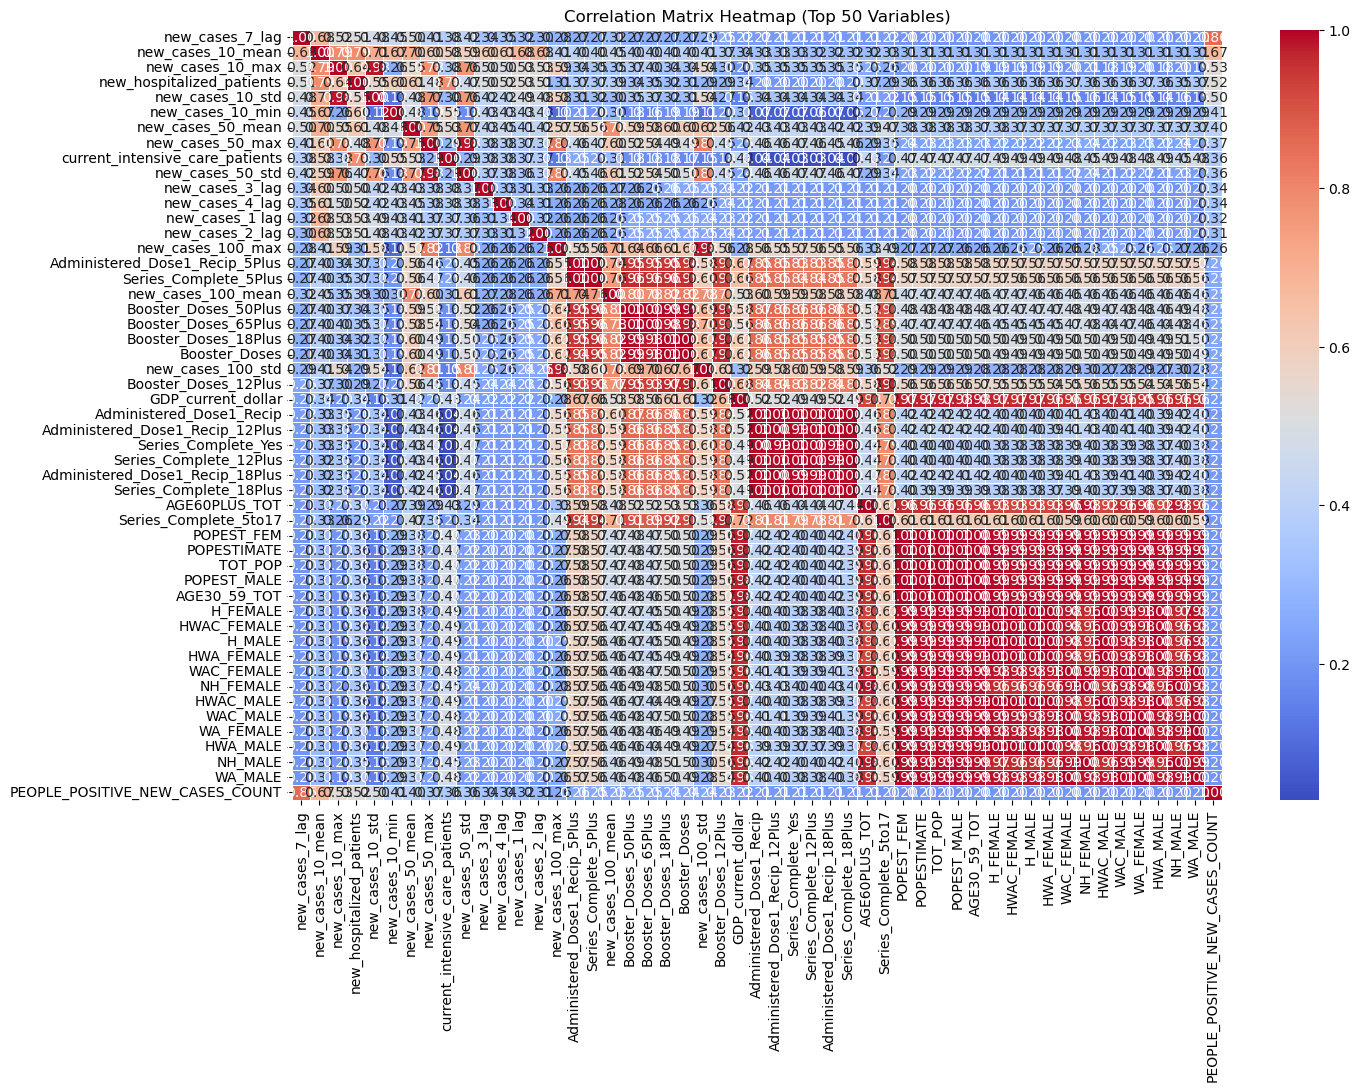

In [290]:
top_50_variables_names = top_50_variables.index.tolist()
top_50_variables_names.append('PEOPLE_POSITIVE_NEW_CASES_COUNT')  # Add 'PEOPLE_NEW_POSITIVE_CASE' to the list

# Select the columns corresponding to the top 50 variables
df_top_50 = df1[top_50_variables_names]

# Create the correlation matrix
correlation_matrix_top_50 = df_top_50.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_top_50, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap (Top 50 Variables)')
plt.show()

In [291]:
df1_filtered['Date'] = pd.to_datetime(df1_filtered['Date'])

df1_filtered.set_index('Date', inplace=True)

In [292]:
df1_filtered['HISP_BLACK'] = df1_filtered['HBAC_MALE'] + df1_filtered['HBAC_FEMALE'] - ((df1_filtered['HBAC_MALE'] - df1_filtered['HBA_MALE']) + (df1_filtered['HBAC_FEMALE'] - df1_filtered['HBA_FEMALE']))
df1_filtered['WHITE'] = df1_filtered['WAC_MALE'] + df1_filtered['WAC_FEMALE'] - ((df1_filtered['WAC_MALE'] - df1_filtered['WA_MALE']) + (df1_filtered['WAC_FEMALE'] - df1_filtered['WA_FEMALE']))
df1_filtered['ASIAN'] = df1_filtered['AAC_MALE'] + df1_filtered['AAC_FEMALE'] - ((df1_filtered['AAC_MALE'] - df1_filtered['AA_MALE']) + (df1_filtered['AAC_FEMALE'] - df1_filtered['AA_FEMALE']))
df1_filtered['NATIVE_AMERICAN'] = df1_filtered['IAC_MALE'] + df1_filtered['IAC_FEMALE'] - ((df1_filtered['IAC_MALE'] - df1_filtered['IA_MALE']) + (df1_filtered['IAC_FEMALE'] - df1_filtered['IA_FEMALE']))
df1_filtered['NATIVE_HAWAIIAN'] = df1_filtered['NAC_MALE'] + df1_filtered['NAC_FEMALE'] - ((df1_filtered['NAC_MALE'] - df1_filtered['NA_MALE']) + (df1_filtered['NAC_FEMALE'] - df1_filtered['NA_FEMALE']))

df1_filtered['WHITE_ASIAN'] = df1_filtered['WHITE'] + df1_filtered['ASIAN']
df1_filtered['NATIVE_PEOPLES'] = df1_filtered['NATIVE_HAWAIIAN'] + df1_filtered['NATIVE_AMERICAN']

In [294]:
columns_to_drop = [
    'TOT_POP', 'WA_MALE', 'WA_FEMALE', 'BA_MALE', 'BA_FEMALE',
    'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE', 'NA_FEMALE', 'TOM_MALE',
    'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE', 'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE',
    'AAC_MALE', 'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'NH_MALE', 'NH_FEMALE',
    'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE', 'NHBA_FEMALE', 'NHIA_MALE', 'NHIA_FEMALE',
    'NHAA_MALE', 'NHAA_FEMALE', 'NHNA_MALE', 'NHNA_FEMALE', 'NHTOM_MALE', 'NHTOM_FEMALE',
    'NHWAC_MALE', 'NHWAC_FEMALE', 'NHBAC_MALE', 'NHBAC_FEMALE', 'NHIAC_MALE', 'NHIAC_FEMALE',
    'NHAAC_MALE', 'NHAAC_FEMALE', 'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE', 'H_FEMALE',
    'HWA_MALE', 'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE', 'HIA_MALE', 'HIA_FEMALE',
    'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE', 'HNA_FEMALE', 'HTOM_MALE', 'HTOM_FEMALE',
    'HWAC_MALE', 'HWAC_FEMALE', 'HBAC_MALE', 'HBAC_FEMALE', 'HIAC_MALE', 'HIAC_FEMALE',
    'HAAC_MALE', 'HAAC_FEMALE', 'HNAC_MALE', 'HNAC_FEMALE', 'POPESTIMATE', 
    'POPEST_MALE', 'POPEST_FEM', 'WHITE', 'ASIAN', 'NATIVE_AMERICAN', 'NATIVE_HAWAIIAN', 
    'PEOPLE_DEATH_NEW_COUNT', 'STATE'
    ]



# Drop the specified columns from df1_filtered
df1_filtered = df1_filtered.drop(columns=columns_to_drop)



## Multicollinearity check

In [295]:
df1_filtered.dtypes

PROVINCE_STATE_NAME                 object
Completeness_pct                   float64
Administered_Dose1_Recip           float64
Administered_Dose1_Recip_5Plus     float64
Administered_Dose1_Recip_12Plus    float64
                                    ...   
AGE30_59_TOT                         int64
AGE60PLUS_TOT                        int64
HISP_BLACK                           int64
WHITE_ASIAN                          int64
NATIVE_PEOPLES                       int64
Length: 107, dtype: object

In [296]:
non_numeric_columns = df1_filtered.select_dtypes(exclude='number').columns

# Display the non-numeric columns
print("Non-Numeric Columns:")
print(non_numeric_columns)

Non-Numeric Columns:
Index(['PROVINCE_STATE_NAME'], dtype='object')


In [297]:
numeric_cols = df1_filtered.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PROVINCE_STATE_NAME']]
                
# It's possible that after excluding specific columns, all remaining columns are already numeric
# If any non-numeric columns remain that were not excluded, you would need to handle them before this step

# Exclude the specified columns
X = df1_filtered[numeric_cols]

# Add a constant to the model (intercept)
X_const = add_constant(X)

# Calculate VIF for each explanatory variable
vif_data = pd.DataFrame({
    "Feature": X_const.columns,
    "VIF": [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
})

print(vif_data)

/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                             Feature            VIF
0                              const       0.000000
1                   Completeness_pct       8.649068
2           Administered_Dose1_Recip   35991.463929
3     Administered_Dose1_Recip_5Plus    3282.081797
4    Administered_Dose1_Recip_12Plus  171619.307709
..                               ...            ...
101                     AGE30_59_TOT  105788.370520
102                    AGE60PLUS_TOT   36564.304309
103                       HISP_BLACK     698.234444
104                      WHITE_ASIAN  145202.874788
105                   NATIVE_PEOPLES    1800.884371

[106 rows x 2 columns]


In [298]:
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)

# Display the sorted DataFrame
print(vif_data_sorted)

                             Feature            VIF
100                     AGE04_29_TOT  213497.267111
10            Series_Complete_12Plus  171798.737112
4    Administered_Dose1_Recip_12Plus  171619.307709
16              Booster_Doses_18Plus  155475.358851
104                      WHITE_ASIAN  145202.874788
..                               ...            ...
20             Second_Booster_65Plus            NaN
21            Bivalent_Booster_5Plus            NaN
22           Bivalent_Booster_12Plus            NaN
23           Bivalent_Booster_18Plus            NaN
24           Bivalent_Booster_65Plus            NaN

[106 rows x 2 columns]


In [299]:
infinite_vif_features = vif_data[vif_data['VIF'] > 100]
infinite_vif_features = infinite_vif_features.sort_values(by='VIF', ascending=False)

# Display the features with infinite VIF values
print(infinite_vif_features)

                             Feature            VIF
100                     AGE04_29_TOT  213497.267111
10            Series_Complete_12Plus  171798.737112
4    Administered_Dose1_Recip_12Plus  171619.307709
16              Booster_Doses_18Plus  155475.358851
104                      WHITE_ASIAN  145202.874788
5    Administered_Dose1_Recip_18Plus  120187.144854
13                     Booster_Doses  108922.436072
101                     AGE30_59_TOT  105788.370520
7                Series_Complete_Yes   93233.660834
11            Series_Complete_18Plus   66267.501961
17              Booster_Doses_50Plus   48004.422963
102                    AGE60PLUS_TOT   36564.304309
2           Administered_Dose1_Recip   35991.463929
18              Booster_Doses_65Plus   14439.769684
25                GDP_current_dollar    3871.877936
8              Series_Complete_5Plus    3662.298238
98                      prop_age8084    3654.803001
3     Administered_Dose1_Recip_5Plus    3282.081797
99          

In [300]:
correlation = df1_filtered.corrwith(df1_filtered['PEOPLE_POSITIVE_NEW_CASES_COUNT'])

# Sort the correlation values in descending order
sorted_correlation = correlation.abs().sort_values(ascending=False)

# Select the top 50 variables with highest correlation
top_50_variables = sorted_correlation.head(51)[1:]  # Excluding 'PEOPLE_NEW_POSITIVE_CASE' itself

# Display the top 50 variables with highest correlation
print(top_50_variables)

new_cases_7_lag                    0.859302
new_cases_10_mean                  0.674350
new_cases_10_max                   0.530666
new_hospitalized_patients          0.519900
new_cases_10_std                   0.495513
new_cases_10_min                   0.411553
new_cases_50_mean                  0.401695
new_cases_50_max                   0.372204
current_intensive_care_patients    0.363902
new_cases_50_std                   0.360566
new_cases_3_lag                    0.344967
new_cases_4_lag                    0.337087
new_cases_1 lag                    0.324797
new_cases_2_lag                    0.309036
new_cases_100_max                  0.256462
Administered_Dose1_Recip_5Plus     0.255418
Series_Complete_5Plus              0.254463
new_cases_100_mean                 0.249910
Booster_Doses_50Plus               0.248393
Booster_Doses_65Plus               0.248221
Booster_Doses_18Plus               0.244522
Booster_Doses                      0.242256
new_cases_100_std               

In [301]:
top_50_variables_names = top_50_variables.index.tolist()
top_50_variables_names.append('PEOPLE_POSITIVE_NEW_CASES_COUNT')  # Add 'PEOPLE_NEW_POSITIVE_CASE' to the list

# Select the columns corresponding to the top 50 variables
df_top_50 = df1_filtered[top_50_variables_names]

# Create the correlation matrix
correlation_matrix = df_top_50.corr()

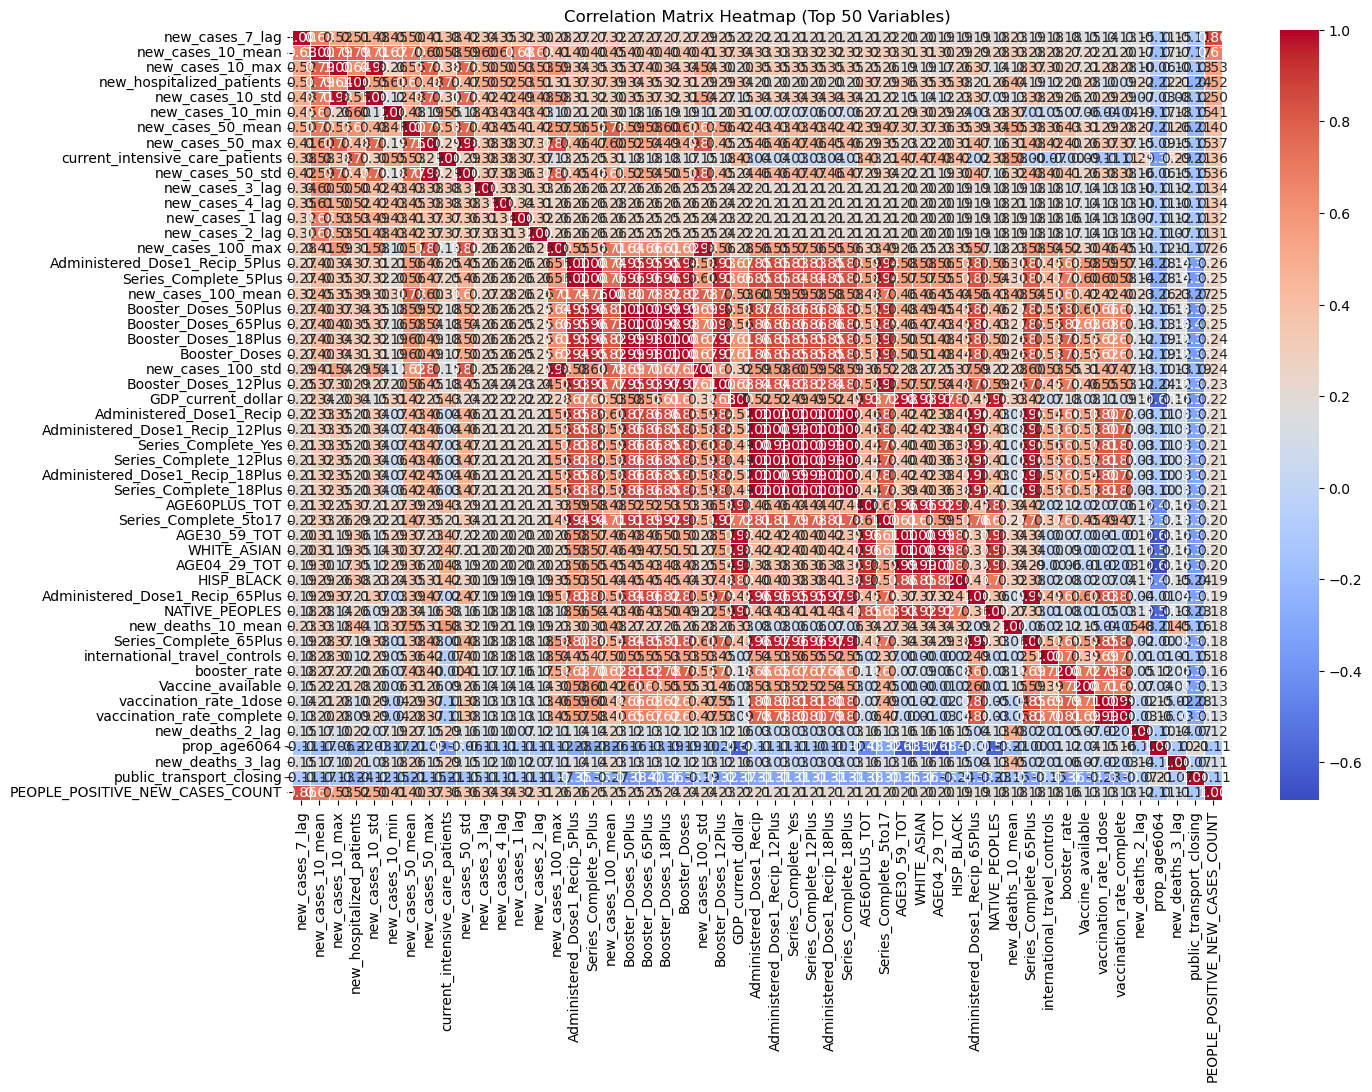

In [302]:
top_50_variables_names = top_50_variables.index.tolist()
top_50_variables_names.append('PEOPLE_POSITIVE_NEW_CASES_COUNT')  # Add 'PEOPLE_NEW_POSITIVE_CASE' to the list

# Select the columns corresponding to the top 50 variables
df_top_50 = df1_filtered[top_50_variables_names]

# Create the correlation matrix
correlation_matrix_top_50 = df_top_50.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_top_50, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap (Top 50 Variables)')
plt.show()

In [303]:
df1_filtered

PROVINCE_STATE_NAME  Completeness_pct  Administered_Dose1_Recip  \
Date                                                                         
2020-03-01          California               0.0                       0.0   
2020-03-02          California               0.0                       0.0   
2020-03-03          California               0.0                       0.0   
2020-03-04          California               0.0                       0.0   
2020-03-05          California               0.0                       0.0   
...                        ...               ...                       ...   
2022-04-25               Texas           25120.6                20890120.0   
2022-04-26               Texas           25120.6                20897363.0   
2022-04-27               Texas           25120.6                20907738.0   
2022-04-28               Texas           25120.6                20914938.0   
2022-04-29               Texas           25120.6                20923657.0   

            Administered_Dose1_Recip_5Plus  Administered_Dose1_Recip_12Plus  \
Date                                                                          
2020-03-01                             0.0                              0.0   
2020-03-02                             0.0                              0.0   
2020-03-03                             0.0                              0.0   
2020-03-04                             0.0                              0.0   
2020-03-05                             0.0                              0.0   
...                                    ...                              ...   
2022-04-25                      20884105.0                       19864532.0   
2022-04-26                      20891339.0                       19869792.0   
2022-04-27                      20901703.0                       19877395.0   
2022-04-28                      20908897.0                       19883027.0   
2022-04-29                      20917612.0                       19889993.0   

            Administered_Dose1_Recip_18Plus  Administered_Dose1_Recip_65Plus  \
Date                                                                           
2020-03-01                              0.0                              0.0   
2020-03-02                              0.0                              0.0   
2020-03-03                              0.0                              0.0   
2020-03-04                              0.0                              0.0   
2020-03-05                              0.0                              0.0   
...                                     ...                              ...   
2022-04-25                       18040473.0                        3628247.0   
2022-04-26                       18044864.0                        3628950.0   
2022-04-27                       18051163.0                        3630034.0   
2022-04-28                       18056005.0                        3631069.0   
2022-04-29                       18061711.0                        3632281.0   

            Series_Complete_Yes  Series_Complete_5Plus  Series_Complete_5to17  \
Date                                                                            
2020-03-01                  0.0                    0.0                    0.0   
2020-03-02                  0.0                    0.0                    0.0   
2020-03-03                  0.0                    0.0                    0.0   
2020-03-04                  0.0                    0.0                    0.0   
2020-03-05                  0.0                    0.0                    0.0   
...                         ...                    ...                    ...   
2022-04-25           17587233.0             17585807.0              2128796.0   
2022-04-26           17591452.0             17590025.0              2130855.0   
2022-04-27           17598026.0             17596598.0              2132974.0   
2022-04-28           17603464.0     

## PCA FILTERING

In [355]:
timestamp_column = df1_filtered.index
target_column = ['PEOPLE_POSITIVE_NEW_CASES_COUNT']
exclude_columns = ['PROVINCE_STATE_NAME']

In [356]:
predictor_columns = [col for col in df1_filtered.columns if col not in (*target_column, *exclude_columns)]

# Separate features (X) and target variable (y)
X = df1_filtered[predictor_columns].values
y = df1_filtered[target_column].values

In [357]:
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X)
pca = PCA()
X_pca = pca.fit(X_std)

Text(0, 0.5, 'cumulative explained variance')

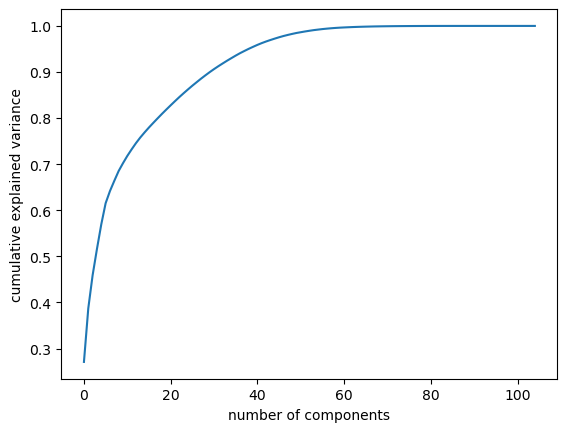

In [358]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [359]:
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
print(pca.n_components_)

54


In [365]:
num_components = 75
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

In [366]:
n_pcs = pca.n_components_  # Get the number of components
# Get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
# Get the initial feature names
initial_feature_names = df1_filtered.columns
# Get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# Get explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Pair each feature name with its component's explained variance ratio
importance_pairs = [(name, explained_variance_ratios[i]) for i, name in enumerate(most_important_names)]

# Sort the pairs by explained variance ratio, in descending order
sorted_importance_pairs = sorted(importance_pairs, key=lambda x: x[1], reverse=True)

# Extract the sorted feature names
sorted_most_important_names = [pair[0] for pair in sorted_importance_pairs]

print(sorted_most_important_names)

['Booster_Doses_50Plus', 'prop_age8084', 'new_cases_50_min', 'new_deaths_10_max', 'PEOPLE_POSITIVE_NEW_CASES_COUNT', 'Vaccine_available', 'new_cases_10_max', 'new_deaths_100_max', 'income_support', 'new_deaths_10_max', 'new_cases_100_max', 'rainfall_mm', 'new_deaths_100_max', 'new_cases_30_lag', 'new_cases_30_lag', 'new_cases_30_lag', 'new_cases_350_lag', 'new_deaths_7_lag', 'new_cases_50_lag', 'international_travel_controls', 'new_cases_50_lag', 'new_cases_150_lag', 'new_deaths_3_lag', 'new_deaths_7_lag', 'income_support', 'new_deaths_4_lag', 'new_deaths_1_lag', 'new_deaths_4_lag', 'vaccination_policy', 'minimum_temperature_celsius', 'new_cases_3_lag', 'rainfall_mm', 'new_cases_1 lag', 'new_deaths_10_min', 'income_support', 'vaccination_policy', 'new_deaths_50_max', 'new_cases_1 lag', 'new_cases_1 lag', 'GDP_current_dollar', 'new_deaths_10_mean', 'debt_relief', 'new_cases_100_min', 'restrictions_on_internal_movement', 'debt_relief', 'restrictions_on_gatherings', 'new_hospitalized_pati

In [367]:
len(sorted_most_important_names)

75

In [368]:
sorted_most_important_names = list(dict.fromkeys(sorted_most_important_names))


In [369]:
len(sorted_most_important_names)

50

In [370]:
# Ensure PEOPLE_POSITIVE_NEW_CASES_COUNT and PROVINCE_STATE_NAME are included
important_columns = sorted_most_important_names + ['PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PROVINCE_STATE_NAME', 'new_cases_7_lag']

# Remove any duplicates from the list
important_columns = list(dict.fromkeys(important_columns))

# Create a new DataFrame with only the specified columns, this will automatically drop any columns not in the list
df_filtered = df1_filtered[important_columns]

# Now, df_filtered contains only the columns of interest without duplicates
df_filtered.columns

Index(['Booster_Doses_50Plus', 'prop_age8084', 'new_cases_50_min',
       'new_deaths_10_max', 'PEOPLE_POSITIVE_NEW_CASES_COUNT',
       'Vaccine_available', 'new_cases_10_max', 'new_deaths_100_max',
       'income_support', 'new_cases_100_max', 'rainfall_mm',
       'new_cases_30_lag', 'new_cases_350_lag', 'new_deaths_7_lag',
       'new_cases_50_lag', 'international_travel_controls',
       'new_cases_150_lag', 'new_deaths_3_lag', 'new_deaths_4_lag',
       'new_deaths_1_lag', 'vaccination_policy', 'minimum_temperature_celsius',
       'new_cases_3_lag', 'new_cases_1 lag', 'new_deaths_10_min',
       'new_deaths_50_max', 'GDP_current_dollar', 'new_deaths_10_mean',
       'debt_relief', 'new_cases_100_min', 'restrictions_on_internal_movement',
       'restrictions_on_gatherings', 'new_hospitalized_patients',
       'new_cases_50_max', 'PROVINCE_STATE_NAME', 'workplace_closing',
       'school_closing', 'dew_point', 'vaccination_rate_1dose',
       'new_deaths_50_min', 'Series_Complete

## XGBoost

In [277]:
correlation = df1[most_important_names].corrwith(df1['PEOPLE_POSITIVE_NEW_CASES_COUNT'])

# Sort the correlation values in descending order
sorted_correlation = correlation.abs().sort_values(ascending=False)

# Select the top 50 variables with highest correlation
top_50_variables = sorted_correlation.head(51)[1:]  # Excluding 'PEOPLE_POSITIVE_NEW_CASES_COUNT' itself

# Display the top 50 variables with highest correlation
top_50_variables

new_cases_10_max                     0.530666
new_hospitalized_patients            0.519900
new_hospitalized_patients            0.519900
new_cases_10_min                     0.411553
new_cases_50_max                     0.372204
new_cases_3_lag                      0.344967
new_cases_4_lag                      0.337087
new_cases_1 lag                      0.324797
new_cases_1 lag                      0.324797
new_cases_1 lag                      0.324797
new_cases_2_lag                      0.309036
Booster_Doses_50Plus                 0.248393
GDP_current_dollar                   0.218103
new_deaths_10_mean                   0.182713
international_travel_controls        0.178565
Vaccine_available                    0.134218
new_deaths_3_lag                     0.112835
vaccination_policy                   0.108702
income_support                       0.095227
income_support                       0.095227
new_cases_30_lag                     0.091516
new_cases_30_lag                  

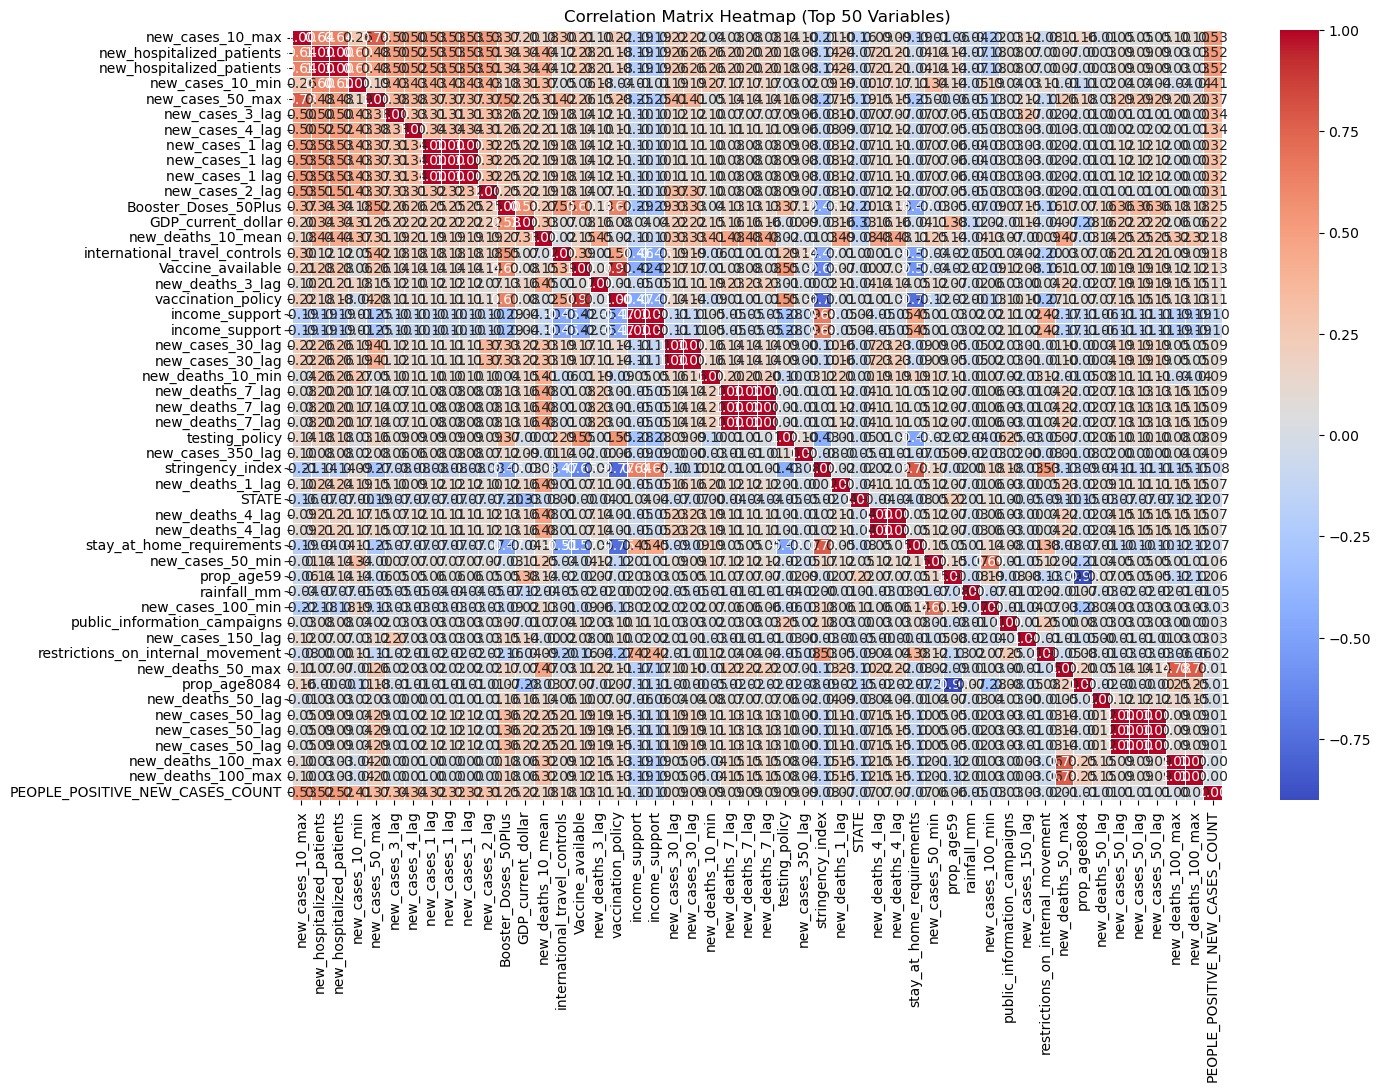

In [279]:
top_50_variables_names = top_50_variables.index.tolist()
top_50_variables_names.append('PEOPLE_POSITIVE_NEW_CASES_COUNT')  # Add 'PEOPLE_NEW_POSITIVE_CASE' to the list

# Select the columns corresponding to the top 50 variables
df_top_50 = df1[top_50_variables_names]

# Create the correlation matrix
correlation_matrix_top_50 = df_top_50.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_top_50, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap (Top 50 Variables)')
plt.show()

In [ ]:
for col in df1_filtered.columns:
    if col != 'PEOPLE_POSITIVE_NEW_CASES_COUNT':
        df1_filtered[col] = pd.to_numeric(df1_filtered[col], errors='coerce')

# Drop any rows with NaN values after conversion (or you could choose to fill them)
df1_filtered.dropna(inplace=True)

# Exclude the PEOPLE_POSITIVE_NEW_CASES_COUNT column
X = df1_filtered.drop(['PEOPLE_POSITIVE_NEW_CASES_COUNT'], axis=1)

# Add a constant to the model (intercept)
X_const = add_constant(X)

# Calculate VIF for each explanatory variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)

In [131]:
len(most_important_names)

50

In [132]:
selected_columns = most_important_names + ['PEOPLE_POSITIVE_NEW_CASES_COUNT']
df_subset_multivariate = df1_filtered[selected_columns]
df_subset_multivariate

HNAC_MALE  new_deaths_10_max   NH_MALE  vaccination_rate_1dose  \
350       51331              569.0  11674729                0.112529   
351       51331              540.0  11674729                0.116297   
352       51331              540.0  11674729                0.117906   
353       51331              540.0  11674729                0.119349   
354       51331              540.0  11674729                0.123748   
...         ...                ...       ...                     ...   
7895      17563               55.0   8911143                0.695652   
7896      17563               55.0   8911143                0.695893   
7897      17563               55.0   8911143                0.696238   
7898      17563               55.0   8911143                0.696478   
7899      17563               55.0   8911143                0.696768   

      POPEST_FEM  new_cases_10_max  NAC_MALE  new_deaths_7_lag  \
350     19536044           14012.0    184613             165.0   
351     19536044           13616.0    184613             288.0   
352     19536044           13616.0    184613             533.0   
353     19536044           13616.0    184613             463.0   
354     19536044           10617.0    184613             540.0   
...          ...               ...       ...               ...   
7895    15010122            6020.0     45352              44.0   
7896    15010122            6020.0     45352              49.0   
7897    15010122            6020.0     45352              42.0   
7898    15010122            3708.0     45352              23.0   
7899    15010122            3708.0     45352              55.0   

      stay_at_home_requirements  restrictions_on_gatherings  ...  \
350                         1.0                         4.0  ...   
351                         1.0                         4.0  ...   
352                         1.0                         4.0  ...   
353                         1.0                         4.0  ...   
354                         1.0                         4.0  ...   
...                         ...                         ...  ...   
7895                        0.0                         0.0  ...   
7896                        0.0                         0.0  ...   
7897                        0.0                         0.0  ...   
7898                        0.0                         0.0  ...   
7899                        0.0                         0.0  ...   

      income_support  rainfall_mm  restrictions_on_gatherings  rainfall_mm  \
350              1.0     1.016000                         4.0     1.016000   
351              1.0     0.084667                         4.0     0.084667   
352              1.0     0.736600                         4.0     0.736600   
353              1.0     0.000000                         4.0     0.000000   
354              1.0     0.000000                         4.0     0.000000   
...              ...          ...                         ...          ...   
7895             1.0     2.082800                         0.0     2.082800   
7896             1.0     8.737600                         0.0     8.737600   
7897             1.0     0.169333                         0.0     0.169333   
7898             1.0     0.000000                         0.0     0.000000   
7899             1.0     0.000000                         0.0     0.000000   

      new_cases_7_lag  new_cases_1 lag  new_hospitalized_patients  \
350           10194.0           9160.0                      733.0   
351           13616.0           5947.0                      643.0   
352           10513.0           5009.0                      714.0   
353            8592.0           8794.0                      761.0   
354           10617.0           6274.0                      710.0   
...               ...              ...                        ...   
7895           6020.0           1110.0                       99.0   
7896           3379.0           1243.0    

In [133]:
selected_columns = ['PEOPLE_POSITIVE_NEW_CASES_COUNT']
df_subset_univariate = df1_filtered[selected_columns]
df_subset_univariate


PEOPLE_POSITIVE_NEW_CASES_COUNT
350                              5947
351                              5009
352                              8794
353                              6274
354                              7848
...                               ...
7895                             1243
7896                             2556
7897                             2513
7898                             2715
7899                             2823

[7550 rows x 1 columns]

In [134]:
selected_columns = most_important_names + ['PEOPLE_POSITIVE_NEW_CASES_COUNT'] + ['PROVINCE_STATE_NAME']
df_subset_multivariate_1 = df1_filtered[selected_columns]
df_subset_multivariate_1

HNAC_MALE  new_deaths_10_max   NH_MALE  vaccination_rate_1dose  \
350       51331              569.0  11674729                0.112529   
351       51331              540.0  11674729                0.116297   
352       51331              540.0  11674729                0.117906   
353       51331              540.0  11674729                0.119349   
354       51331              540.0  11674729                0.123748   
...         ...                ...       ...                     ...   
7895      17563               55.0   8911143                0.695652   
7896      17563               55.0   8911143                0.695893   
7897      17563               55.0   8911143                0.696238   
7898      17563               55.0   8911143                0.696478   
7899      17563               55.0   8911143                0.696768   

      POPEST_FEM  new_cases_10_max  NAC_MALE  new_deaths_7_lag  \
350     19536044           14012.0    184613             165.0   
351     19536044           13616.0    184613             288.0   
352     19536044           13616.0    184613             533.0   
353     19536044           13616.0    184613             463.0   
354     19536044           10617.0    184613             540.0   
...          ...               ...       ...               ...   
7895    15010122            6020.0     45352              44.0   
7896    15010122            6020.0     45352              49.0   
7897    15010122            6020.0     45352              42.0   
7898    15010122            3708.0     45352              23.0   
7899    15010122            3708.0     45352              55.0   

      stay_at_home_requirements  restrictions_on_gatherings  ...  rainfall_mm  \
350                         1.0                         4.0  ...     1.016000   
351                         1.0                         4.0  ...     0.084667   
352                         1.0                         4.0  ...     0.736600   
353                         1.0                         4.0  ...     0.000000   
354                         1.0                         4.0  ...     0.000000   
...                         ...                         ...  ...          ...   
7895                        0.0                         0.0  ...     2.082800   
7896                        0.0                         0.0  ...     8.737600   
7897                        0.0                         0.0  ...     0.169333   
7898                        0.0                         0.0  ...     0.000000   
7899                        0.0                         0.0  ...     0.000000   

      restrictions_on_gatherings  rainfall_mm  new_cases_7_lag  \
350                          4.0     1.016000          10194.0   
351                          4.0     0.084667          13616.0   
352                          4.0     0.736600          10513.0   
353                          4.0     0.000000           8592.0   
354                          4.0     0.000000          10617.0   
...                          ...          ...              ...   
7895                         0.0     2.082800           6020.0   
7896                         0.0     8.737600           3379.0   
7897                         0.0     0.169333           2637.0   
7898                         0.0     0.000000           2817.0   
7899                         0.0     0.000000           3708.0   

      new_cases_1 lag  new_hospitalized_patients  Series_Complete_12Plus  \
350            9160.0                      733.0               1367222.0   
351            5947.0                      643.0               1490486.0   
352            5009.0                      714.0               1544250.0   
353            8794.0                      761.0               1588941.0   
354            6274.0                      710.0               1724630.0   
...               ...                        ...                     ...   
7895           1110.0                       99.0  

In [72]:
state_dataframes = {}
states = ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan']

# Iterate through each state in the list
for state in states:
    # Filter data for the current state
    df_subset_state = df_subset_multivariate_1[df_subset_multivariate_1['PROVINCE_STATE_NAME'] == state].copy()
    
    # Store the DataFrame in the dictionary with the state name as the key
    state_dataframes[state] = df_subset_state

In [73]:
sub_CA = state_dataframes['California']
sub_TX = state_dataframes['Texas']
sub_FL = state_dataframes['Florida']
sub_NY = state_dataframes['New York']
sub_PA = state_dataframes['Pennsylvania']
sub_IL = state_dataframes['Illinois']
sub_NC = state_dataframes['North Carolina']
sub_OH = state_dataframes['Ohio']
sub_GA = state_dataframes['Georgia']
sub_MI = state_dataframes['Michigan']

sub_CA = sub_CA.drop(columns=['PROVINCE_STATE_NAME'])
sub_TX = sub_TX.drop(columns=['PROVINCE_STATE_NAME'])
sub_FL = sub_FL.drop(columns=['PROVINCE_STATE_NAME'])
sub_NY = sub_NY.drop(columns=['PROVINCE_STATE_NAME'])
sub_PA = sub_PA.drop(columns=['PROVINCE_STATE_NAME'])
sub_IL = sub_IL.drop(columns=['PROVINCE_STATE_NAME'])
sub_NC = sub_NC.drop(columns=['PROVINCE_STATE_NAME'])
sub_OH = sub_OH.drop(columns=['PROVINCE_STATE_NAME'])
sub_GA = sub_GA.drop(columns=['PROVINCE_STATE_NAME'])
sub_MI = sub_MI.drop(columns=['PROVINCE_STATE_NAME'])

In [74]:
desktop_path = "/Users/asherbank/Desktop/"

# Save each DataFrame as a separate CSV file
sub_CA.to_csv(desktop_path + "sub_CA.csv", index=False)
sub_TX.to_csv(desktop_path + "sub_TX.csv", index=False)
sub_FL.to_csv(desktop_path + "sub_FL.csv", index=False)
sub_NY.to_csv(desktop_path + "sub_NY.csv", index=False)
sub_PA.to_csv(desktop_path + "sub_PA.csv", index=False)
sub_IL.to_csv(desktop_path + "sub_IL.csv", index=False)
sub_NC.to_csv(desktop_path + "sub_NC.csv", index=False)
sub_OH.to_csv(desktop_path + "sub_OH.csv", index=False)
sub_GA.to_csv(desktop_path + "sub_GA.csv", index=False)
sub_MI.to_csv(desktop_path + "sub_MI.csv", index=False)
df_subset_multivariate.to_csv(desktop_path + "df_subset_multivariate.csv", index=False)
df_subset_univariate.to_csv(desktop_path + "df_subset_univariate.csv", index=False)

In [75]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

X = df1_filtered[predictor_columns]
feature_names = X.columns.tolist()

# Z-score the features
scaler = StandardScaler()
X_zscored = scaler.fit_transform(X)

# Define the model
model = LinearRegression()

# Define the number of features to select
num_features_to_select = 50  # Adjust as needed

# Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)  # Adjust the number of splits as needed

# Initialize RFE
rfe = RFE(model, n_features_to_select=num_features_to_select)

# Fit RFE with cross-validation
X_rfe = rfe.fit_transform(X_zscored, y)

# Get the selected feature indices
selected_feature_indices = np.where(rfe.support_)[0]

# Get the names of the selected features
selected_features = [feature_names[i] for i in selected_feature_indices]

# Print selected features
print("Selected Features:", selected_features)

# Use the selected features for cross-validation
cross_val_scores = cross_val_score(model, X_rfe, y, cv=tscv, scoring='r2')

# Print or use the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", np.mean(cross_val_scores))



Selected Features: ['WA_MALE', 'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'IAC_MALE', 'AAC_MALE', 'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE', 'NHBA_FEMALE', 'NHIA_MALE', 'NHIA_FEMALE', 'NHAA_MALE', 'NHAA_FEMALE', 'NHNA_MALE', 'NHTOM_MALE', 'NHWAC_MALE', 'NHWAC_FEMALE', 'NHBAC_MALE', 'NHAAC_MALE', 'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE', 'H_FEMALE', 'HBA_MALE', 'HBA_FEMALE', 'HIA_MALE', 'HIA_FEMALE', 'HAA_MALE', 'HAA_FEMALE', 'HTOM_MALE', 'HTOM_FEMALE', 'HWAC_MALE', 'HWAC_FEMALE', 'HBAC_MALE', 'HBAC_FEMALE', 'HIAC_FEMALE', 'HAAC_MALE', 'HAAC_FEMALE', 'HNAC_MALE', 'POPEST_MALE', 'POPEST_FEM']
Cross-Validation Scores: [-9.76607595e+23 -1.50045349e+22 -5.47670509e+21 -9.40117404e+18
 -1.12384510e+19]
Mean CV Score: -1.994218949534435e+23


In [270]:
num_components_range = range(1, min(X.shape[0], X.shape[1]) + 1)
explained_variances = []

for num_components in num_components_range:
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

# Plot the explained variance for each number of components
plt.plot(num_components_range, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

KeyboardInterrupt: 

In [ ]:
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X_zscored = scaler.transform(X)
# The PCA model
num_components = 20
pca = PCA(n_components=num_components) # estimate only 20 PCs
X_new = pca.fit_transform(X_zscored) # project the original data into the PCA space

explained_variance_ratio = pca.explained_variance_ratio_

In [ ]:
# Get the loadings of each original feature on each principal component
loadings = pca.components_

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=predictor_columns)

# Calculate the absolute loadings and sum across principal components
absolute_loadings_sum = loadings_df.abs().sum(axis=1)

# Sort features based on the sum of absolute loadings
top_features = absolute_loadings_sum.sort_values(ascending=False)

# Display the top features
print(top_features)

new_deaths_250_lag                 2.611161e+00
administered_dose1_recip_10_std    2.528730e+00
new_deaths_50_lag                  2.524825e+00
new_cases_350_lag                  2.425177e+00
new_cases_30_lag                   2.364240e+00
                                       ...     
Bivalent_Booster_18Plus            2.792905e-16
Second_Booster_65Plus              2.315856e-16
Second_Booster_50Plus              2.307182e-16
Bivalent_Booster_5Plus             1.873501e-16
Bivalent_Booster_65Plus            9.020562e-17
Length: 213, dtype: float64


In [ ]:
# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that capture 95% of the variance
num_components_99 = np.argmax(cumulative_explained_variance >= 0.99) + 1

# Select the corresponding eigenvectors
selected_eigenvectors_99 = pca.components_[:num_components_99, :]

# Project the original data into the reduced PCA space
X_pca_99 = np.dot(X_zscored, selected_eigenvectors_99.T)

# Print the number of components and the top features for 95% variance
print(f"Number of components to capture 99% of variance: {num_components_99}")
print("Top features based on loadings:")
top_features_99 = loadings_df.abs().sum(axis=1).nlargest(50)
print(top_features_99)

Number of components to capture 99% of variance: 1
Top features based on loadings:
new_deaths_250_lag                  2.611161
administered_dose1_recip_10_std     2.528730
new_deaths_50_lag                   2.524825
new_cases_350_lag                   2.425177
new_cases_30_lag                    2.364240
new_deaths_5_lag                    2.319824
new_deaths_30_lag                   2.256736
new_deaths_100_min                  2.191236
new_deaths_2 lag                    2.168076
new_deaths_7_lag                    2.124383
new_deaths_10_min                   2.118364
new_deaths_50_min                   2.077686
new_cases_10_min                    2.057316
new_deaths_10_std                   2.016241
new_cases_2_lag                     1.988486
new_cases_150_lag                   1.987929
new_deaths_10_max                   1.956515
new_cases_50_lag                    1.837071
Completeness_pct                    1.742498
NHIA_FEMALE                         1.742315
new_deaths_100_ma

In [ ]:
# Find the number of components that capture 95% of the variance
num_components_99 = np.argmax(cumulative_explained_variance >= 0.99) + 1

# Select the corresponding eigenvectors
selected_eigenvectors_99 = eigenvectors[:, :num_components_99]

# Project the original data into the reduced PCA space
X_pca_99 = np.dot(X_zscored, selected_eigenvectors_99)

# Print the number of components and the top features for 95% variance
print(f"Number of components to capture 99% of variance: {num_components_99}")
print("Top features based on loadings:")
top_features_99 = loadings_df.abs().sum(axis=1).nlargest(50)
print(top_features_99)

NameError: name 'eigenvectors' is not defined

In [ ]:
# Set the eigenvalue threshold
eigenvalue_threshold = 1.0

# Find features with significant eigenvalues
significant_feature_indices = np.where(eigenvalues >= eigenvalue_threshold)[0]
significant_features = np.array(predictor_columns)[significant_feature_indices]

# Print the significant features
print("Features with eigenvalues above the threshold:")
print(significant_features)

NameError: name 'eigenvalues' is not defined

In [ ]:
top_100_features = absolute_loadings_sum.nlargest(100)
print(top_100_features)

new_cases_100_min                  2.146998
new_cases_50_min                   2.081475
new_deaths_250_lag                 1.996863
new_deaths_30_lag                  1.978033
new_cases_30_lag                   1.930372
                                     ...   
HBA_FEMALE                         0.822921
HBA_MALE                           0.820232
administered_dose1_recip_50_min    0.804944
Booster_Doses_50Plus               0.802100
HBAC_FEMALE                        0.784381
Length: 100, dtype: float64


Feature Importance from Tree-based Models:

In [ ]:
##from sklearn.ensemble import RandomForestClassifier

# Fit a random forest model
##model = RandomForestClassifier()
##model.fit(X, y)

# Get feature importances
##feature_importances = model.feature_importances_

# Select top features based on importance
##top_features = np.argsort(feature_importances)[::-1][:50]


/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_792/262418797.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


Recursive Feature Elimination (RFE) with TimeSeriesSplit:

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=50)
tscv = TimeSeriesSplit(n_splits=5)  # Adjust the number of splits
X_selected = selector.fit(X, y).transform(X)

Recursive Feature Elimination (RFE):

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Choose an estimator
estimator = LinearRegression()

# Use RFE to select top features
selector = RFE(estimator, n_features_to_select=50)
X_selected = selector.fit_transform(X, y)

Univariate Feature Selection:

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top k features based on ANOVA F-statistic
k_best = SelectKBest(f_classif, k=50)
X_selected = k_best.fit_transform(X, y)

L1 Regularization (LASSO):

In [ ]:
from sklearn.linear_model import LassoCV

# Fit Lasso regression with cross-validated alpha selection
model = LassoCV()
model.fit(X, y)

# Select non-zero coefficient features
top_features = np.where(model.coef_ != 0)[0][:50]

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

In [ ]:
# Z-score normalization
scaler = StandardScaler()
X_zscored = scaler.fit_transform(X)

# Calculate the covariance matrix
covariance_matrix = np.cov(X_zscored, rowvar=False)

# Eigenvalue decomposition of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Choose the number of components
num_components = 50
selected_eigenvectors = eigenvectors[:, :num_components]

# Project the original data into the PCA space
X_pca = np.dot(X_zscored, selected_eigenvectors)

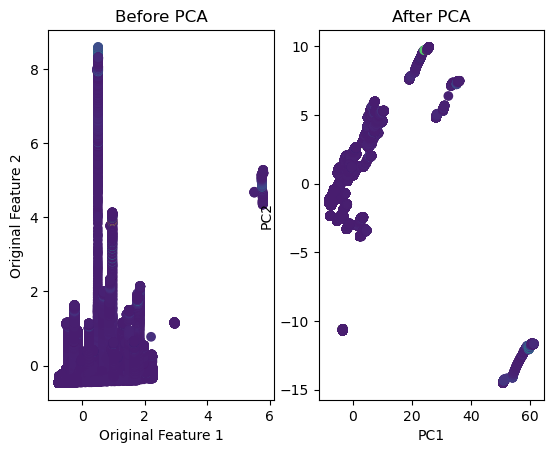

In [ ]:
# Plot the data before and after PCA transformation
fig, axes = plt.subplots(1, 2)
axes[0].scatter(X_zscored[:, 0], X_zscored[:, 1], c=y)
axes[0].set_xlabel('Original Feature 1')
axes[0].set_ylabel('Original Feature 2')
axes[0].set_title('Before PCA')

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')

plt.show()

In [ ]:
# Print the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print(explained_variance_ratio)

[ 7.66179071e-01  8.26665548e-02  6.42056740e-02  3.00009615e-02
  1.52615515e-02  1.15901053e-02  9.00701686e-03  6.25050652e-03
  4.82591776e-03  3.03271178e-03  1.80807406e-03  1.24422742e-03
  7.28679918e-04  6.97620832e-04  5.93590852e-04  4.92037047e-04
  3.01153352e-04  2.85597543e-04  1.91884472e-04  1.19128947e-04
  9.49484912e-05  7.76504014e-05  5.60191572e-05  4.93008234e-05
  3.98397096e-05  3.80667786e-05  3.30313961e-05  3.09469279e-05
  1.84588025e-05  1.65162153e-05  1.10948537e-05  9.05391894e-06
  6.64179954e-06  5.89674185e-06  4.47013889e-06  3.79485444e-06
  3.15360991e-06  2.49711236e-06  2.23954977e-06  2.01024447e-06
  1.78888564e-06  1.52414527e-06  1.30477533e-06  1.13452708e-06
  1.05351871e-06  7.74528590e-07  7.35510874e-07  5.75875337e-07
  4.75656977e-07  4.30604054e-07  3.54412060e-07  3.20472971e-07
  2.93503019e-07  2.68495870e-07  1.97357943e-07  1.57911978e-07
  1.24949868e-07  1.03620740e-07  8.59713339e-08  8.39298911e-08
  6.38520010e-08  5.93318

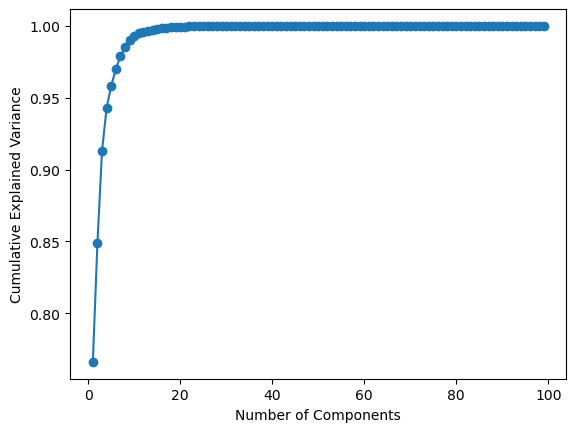

In [ ]:
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components='mle')  # You can also specify the number of components if needed
X_pca = pca.fit_transform(X_standardized)

# Analyze explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Choose the number of components that explain a desired percentage of variance
desired_variance_percentage = 0.95
cumulative_explained_variance = explained_variance_ratio.cumsum()
num_components = (cumulative_explained_variance < desired_variance_percentage).sum() + 1

# Retrain PCA with the chosen number of components
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_standardized)

In [ ]:
X_pca

array([[-2.71163004, -1.43604847, -1.74955618, -0.49212083,  0.48103031],
       [-2.71163004, -1.43604847, -1.74955618, -0.49212083,  0.48103031],
       [-2.71163004, -1.43604847, -1.74955618, -0.49212083,  0.48103031],
       ...,
       [-7.99806945,  1.31663896,  0.60843986, -0.40173904, -1.26345897],
       [-7.99801239,  1.31662622,  0.60864471, -0.40173879, -1.26347461],
       [-7.99795775,  1.31661035,  0.60884618, -0.4017381 , -1.26347948]])

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.76617907 0.08266655 0.06420567 0.03000096 0.01526155]


In [ ]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=predictor_columns)
loadings_df

Completeness_pct  Administered_Dose1_Recip  Administered_Dose1_Recip_5Plus  \
0          0.016709                  0.058186                        0.067149   
1         -0.085453                 -0.017200                       -0.013675   
2          0.161840                  0.239860                        0.202378   
3          0.040826                  0.001326                        0.008416   
4          0.067924                  0.021651                       -0.031849   

   Administered_Dose1_Recip_12Plus  Administered_Dose1_Recip_18Plus  \
0                         0.058337                         0.058434   
1                        -0.017508                        -0.018163   
2                         0.238788                         0.238646   
3                         0.001432                         0.001024   
4                         0.023740                         0.025010   

   Administered_Dose1_Recip_65Plus  Series_Complete_Yes  \
0                         0.057664             0.056479   
1                        -0.036684            -0.020359   
2                         0.231441             0.242284   
3                         0.000303             0.001846   
4                         0.058518             0.024252   

   Series_Complete_5Plus  Series_Complete_5to17  Series_Complete_12Plus  ...  \
0               0.066637               0.065133                0.056601  ...   
1              -0.018375               0.024651               -0.020751  ...   
2               0.205086               0.191093                0.241356  ...   
3               0.008351              -0.001796                0.001837  ...   
4              -0.029402              -0.075017                0.026033  ...   

   AGE7579_MALE  AGE7579_FEM  AGE8084_TOT  AGE8084_MALE  AGE8084_FEM  \
0      0.089036     0.089415     0.088799      0.088387     0.089021   
1     -0.054766    -0.055598    -0.053852     -0.051933    -0.055234   
2     -0.009756    -0.010736    -0.014699     -0.014098    -0.015135   
3     -0.006027    -0.009293    -0.010688     -0.007765    -0.012863   
4      0.044801     0.040620     0.038874      0.043047     0.035714   

   AGE85PLUS_TOT  AGE85PLUS_MALE  AGE85PLUS_FEM  GDP_current_dollar  \
0       0.088536        0.087994       0.088632            0.092172   
1      -0.044279       -0.040431      -0.046363            0.004873   
2      -0.017829       -0.015602      -0.019053            0.002184   
3      -0.020825       -0.016040      -0.023497           -0.008702   
4       0.025636        0.032216       0.021831           -0.057972   

   personal_income  
0         0.041505  
1        -0.126823  
2        -0.034463  
3         0.060177  
4        -0.043911  

[5 rows x 158 columns]

In [ ]:
# Calculate the absolute values of loadings
absolute_loadings = np.abs(loadings)

# Create a DataFrame with feature names and their average absolute loadings across all principal components
average_loadings = pd.DataFrame(absolute_loadings.mean(axis=0), index=predictor_columns, columns=['Average Loading'])

# Sort the features by their average absolute loadings in descending order
top_predictors = average_loadings.sort_values(by='Average Loading', ascending=False)

# Display the top predictors
print(top_predictors)

                         Average Loading
NHIA_MALE                       0.141471
NHIA_FEMALE                     0.141341
NHIAC_FEMALE                    0.131800
NHIAC_MALE                      0.131792
NHNAC_MALE                      0.130871
...                                  ...
Second_Booster_65Plus           0.000000
Bivalent_Booster_5Plus          0.000000
Bivalent_Booster_12Plus         0.000000
Bivalent_Booster_18Plus         0.000000
Bivalent_Booster_65Plus         0.000000

[158 rows x 1 columns]


In [ ]:
# Assuming X is your feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# You can choose the number of components or use 'mle' for automatic determination
pca = PCA(n_components='mle')
X_pca = pca.fit_transform(X_scaled)

NameError: name 'X' is not defined